# Introduction to Data Science
## Homework 3

Student Name: Zhifan Nan

Student Netid: zn2041
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

- $$H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x) = \sum_{x \in X} p(x) \cdot (-\sum_{y \in Y} p(y \mid x) \cdot log(p(y \mid x))) =  \sum_{x \in X} p(x) \cdot (-\sum_{y \in Y} \frac{p(x, y)}{p(x)} \cdot log(p(y \mid x))) = - \sum_{x \in X} \sum_{y \in Y} p(x, y) \cdot log(p(y \mid x))$$

- $$H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y)) = - \sum_{x \in X} \sum_{y \in Y} p(x, y) \cdot log(p(y))$$

- $$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)} = \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot (log(p(x,y)) - log(p(x)p(y))) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot (log(p(x)p(y \mid x)) - log(p(x)p(y)))$$

$$ = \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot (log(p(x)) + log(p(y \mid x)) - log(p(x)) - log(p(y))) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot (log(p(y \mid x)) - log(p(y))) = \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log(p(y \mid x)) - \sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log(p(y))) $$

$$ = -H(Y \mid X) - (-H(Y)) = H(Y) - H(Y \mid X) $$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import pandas as pd

columns = ["revenue","outcalls","incalls","months","eqpdays","webcap","marryyes","travel","pcown","credictd","retcalls","churndep"]
cell = pd.read_csv("cell2cell_data.csv", names = columns)

cell_train = cell.sample(frac=0.8)
cell_test = cell[~cell.index.isin(cell_train.index)]

cell_train.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,credictd,retcalls,churndep
28022,83.02,13.00,3.00,7,198,1,0,0,0,0,0,0
25665,97.23,12.00,8.33,15,357,1,0,0,0,0,0,0
33670,30.26,0.67,0.00,32,461,1,1,0,0,1,0,0
20939,34.88,2.33,0.00,36,1089,1,1,0,1,1,0,0
17054,40.14,15.33,2.00,14,85,1,0,0,0,0,0,1


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

Answer: We can show the distribution of each of the features after sampling, and if they are almost identical to the distribution of every feature in X, then we can conclude that they are indeed randomly selected.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [2]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy")

X_train, y_train = cell_train.iloc[:, :-1], cell_train.iloc[:, -1]
X_test, y_test = cell_test.iloc[:, :-1], cell_test.iloc[:, -1]
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

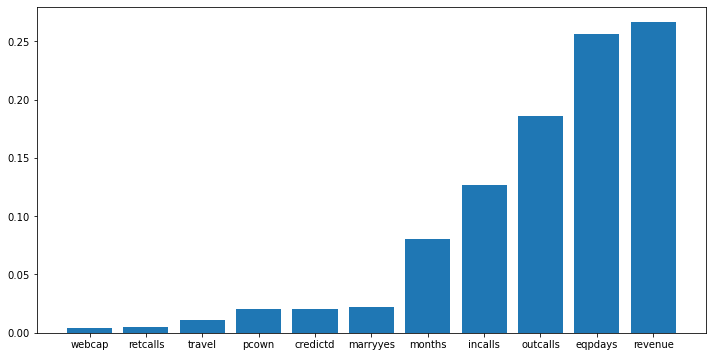

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importance = zip(X_train.columns, dt.feature_importances_)
feature_importance = sorted(feature_importance, key = lambda x: x[1])
feature_list = [x[0] for x in feature_importance]
importance_list = [x[1] for x in feature_importance]
plt.figure(figsize=(12, 6))
plt.bar(feature_list, importance_list)
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [28]:
cell_top3 = cell[['outcalls', 'eqpdays', 'revenue']]
cell_top3.corr()

,outcalls,eqpdays,revenue
outcalls,1.000000,-0.243999,0.500870
eqpdays,-0.243999,1.000000,-0.221958
revenue,0.500870,-0.221958,1.000000


C:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


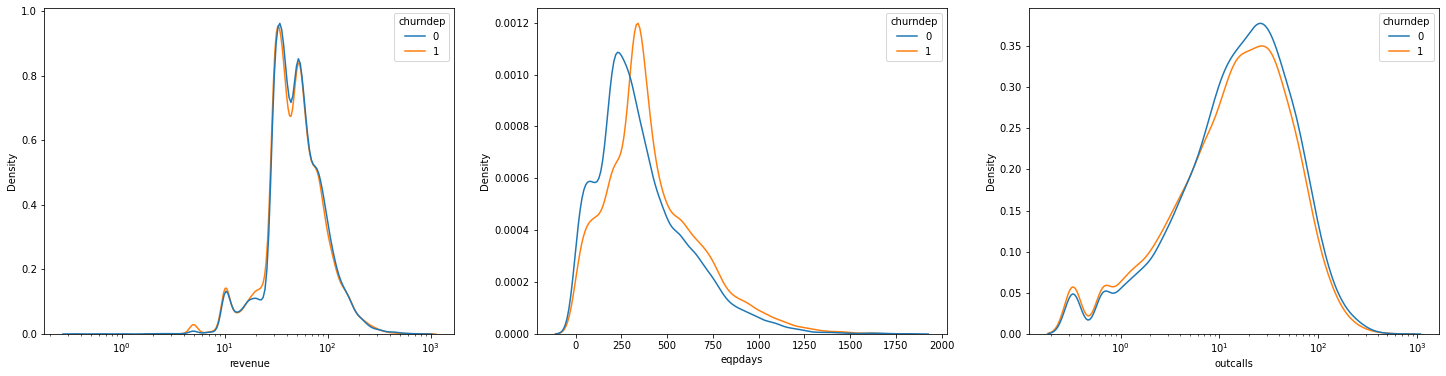

In [68]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 6))
sns.kdeplot(x = 'revenue', hue='churndep', data=cell.loc[cell['revenue']!=0], log_scale=True, ax=ax1)
sns.kdeplot(x = 'eqpdays', hue='churndep', data=cell, ax=ax2)
sns.kdeplot(x = 'outcalls', hue='churndep', data=cell.loc[cell['outcalls']!=0], log_scale=True, ax=ax3)
plt.show()

In [74]:
cell[['revenue', 'eqpdays', 'outcalls', 'churndep']].groupby('churndep').median()

,revenue,eqpdays,outcalls
churndep,,,
0,48.895,310,14.00
1,47.790,366,12.33


- From the correlation table, we can intuitively see the relationship between the top 3 important features. The relationship between revenue and outcalls are positive, while the relationship between revenue and equipment days and the relationship between equipment days and outcalls are both negative. 


- To find out their relationship between the churn outcome, I first applied log transformation to revenue and outcalls becasue of their extremely skewed distribution. Then, I plotted the distribution for all three features for both churned and unchurned customers. Finally I computed the median for all three features for both churned and unchurned customers to see whether it conforms our observation from the plots.


- From the second plot, it's obvious that in terms of the equipment days, customers who has a longer equipment days are more likely to churn, which actually makes sense because we may get tired of the things we had for too long, and we are more likely to turn to other products and try something new. This conclusion also gets confirmed by our groupby table. We can see the median equipment days for those who did not churn is 310, while the number is 366 for those churned customers.


- From the third plot, we can also see a slight shift between these two distributions, it seems like customers who have more outcalls are less likely to churn. The reason could be that making more outcalls means users have more stickiness to our products, and are more willing to use our products, so they are less likely to churn. The groupby table gives us the same result, which says that the median outcalls made by customers who did not churn is 14, while that number decreases to 12.33 for churned customers.


- From the first plot, we can hardly see a clear relationship between customer's revenue and churn outcome, but it's the one that has the highest feature importance given by decision tree classifier. So we can go to the groupby table to see whether we can find anything, and it turns out that the churned customers have a lower median revenue than those who did not churn. This is an interesting finding, and one possible explaination is that users who have higher monthly revenue are elder and busy people, and they have a more stable lifestyle and thus less likely to churn.


6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [80]:
y_train_pred = dt.predict(X_train)
print('accuracy on train set {0:.5f}'.format(np.mean(y_train_pred == y_train)))
y_test_pred = dt.predict(X_test)
print('accuracy on test set {0:.5f}'.format(np.mean(y_test_pred == y_test)))

accuracy on train set 0.99981
accuracy on test set 0.53086


Answer: This is a typical example of overfitting. The classifier memorizes the training set and did a really good job at classifying, but does not generalize well to holdout set. 

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [25]:
min_samples_split_values = range(20, 2820, 280)
min_samples_leaf_values = range(5, 205, 20)

In [26]:
list(min_samples_split_values)

[20, 300, 580, 860, 1140, 1420, 1700, 1980, 2260, 2540]

In [27]:
list(min_samples_leaf_values)

[5, 25, 45, 65, 85, 105, 125, 145, 165, 185]

2\. Explain in words your reasoning for choosing the above ranges.

Answer: The reason I chose the above ranges is that I would like to try a broader range of parameters at first to cover the underfitting to overfitting. If there's a specific range that accuracy appears to be higher, then we can go deeper into that specific range and fine tune the parameter.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

test_accuracy = []
for i in min_samples_leaf_values:
    split_accuracy = []
    for j in min_samples_split_values:
        dt = DecisionTreeClassifier(criterion="entropy", min_samples_split=j, min_samples_leaf=i)
        dt.fit(X_train, y_train)
        pred = dt.predict(X_test)
        acc = np.mean(pred == y_test)
        split_accuracy.append(acc)
    test_accuracy.append(split_accuracy)

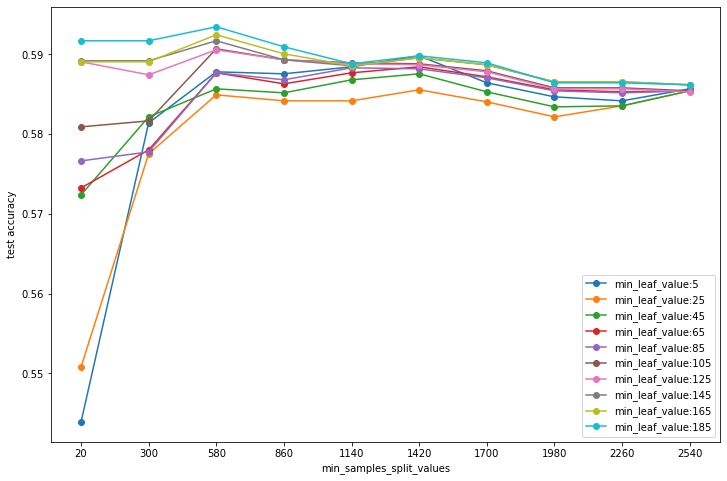

In [29]:
plt.figure(figsize=(12, 8))
for i in range(len(test_accuracy)):
    plt.plot(min_samples_split_values, test_accuracy[i], 'o-', label='min_leaf_value:{}'.format(min_samples_leaf_values[i]))
    plt.xticks(min_samples_split_values)
    plt.xlabel('min_samples_split_values')
    plt.ylabel('test accuracy')
    plt.legend()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

In [30]:
max_acc = max([max(i) for i in test_accuracy])
for i in range(len(test_accuracy)):
    try:
        j = test_accuracy[i].index(max_acc)
        break
    except:
        continue
print("optimal configuration: min_sample_split_value: {}, min_sample_leaf_value: {} \nAccuracy: {:.5f}".format(min_samples_split_values[j], min_samples_leaf_values[i], max_acc))

optimal configuration: min_sample_split_value: 580, min_sample_leaf_value: 185 
Accuracy: 0.59345


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Answer: We can use the churn prediction model to predict the probability of churn for customers and improve the customer retention by reducing the number of churn to some extent. For example, If a customer has high probability of churn (say > 70%), we can probably send out some strong promotion to him/her and try our best to keep him/her in our business. If customers have a probability of churn between 50%-70%, they could have some tendency leaving our business but they haven't made up their mind yet, so we can also send out some promotions, which don't need to be too costly as the previous one but should provide some incentives for them to stay with us. In this way, we can increase our customer retention to make sure we will have our desired market share.  